## Лабораторная работа № 1

**Центральная предельная теорема** утверждает, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.

Оцените распределение выборочного среднего случайной величины при разных объёмах выборок. Для этоговыполните следующие шаги.

**Решение должно содержать краткие пояснения каждого блока кода. И не забудьте подписывать оси графиков.**

1. Выберите любое распределение из тех, что не были описаны в курсе: [непрерывные](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html#continuous-distributions-in-scipy-stats), [дискретные](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html#discrete-distributions-in-scipy-stats). Сгенерируйте из него выборку, постройте гистограмму и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Выберем геометрическое распределение

In [62]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

Text(0.5, 0, '$x$')

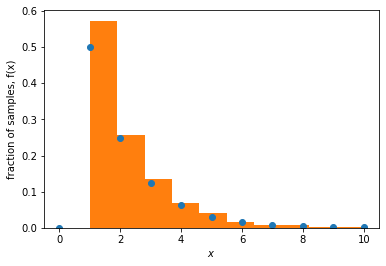

In [63]:
#зададим параметры:
p = 0.5

#построим распределение:
geom_rv = sts.geom(p)

#создадим выборку
sample=geom_rv.rvs(size=1000)

#построим функцию распределения
x = np.linspace(0, 10, 11)
pmf = geom_rv.pmf(x)
plt.plot(x, pmf, 'o')
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

# гистограмма выборки
plt.hist(sample, density=True)
plt.ylabel('fraction of samples, f(x)')
plt.xlabel('$x$')

2. При пяти значениях n (например, 5, 10, 25, 50 и 100) сгенерируйте k (например, 1000) выборок объёма n и постройте гистограммы распределений их выборочных средних. 

In [64]:
#задали распредедение и нужные параметры
geom_rv = sts.geom(p)
m=[[], [], [], [], []]
k = 1000
n=[5, 10 , 25 , 50 , 100]
#циклом считаем выборочное среднее сразу для всех n
for elem in n:
    j = n.index(elem)
    for i in range (0, k):
        sample=geom_rv.rvs(size=elem)
        m[j].append(np.mean(sample))

3. Используя информацию о среднем и дисперсии исходного распределения (её можно найти на [Википедии](https://ru.wikipedia.org)), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. 

In [114]:
#матожидание
M=1/p
#дисперсия
sigma=sqrt((1-p)/p**2)
print (M, sigma)

2.0 1.4142135623730951


4. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

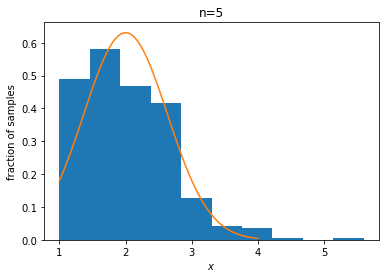

In [115]:
#строим гистограммы и соостветствующие нормальные распределения
plt.hist(m[0], density=True, label='5') 
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title("n=5") 

norm_rv = sts.norm(M, sigma/sqrt(n[0]))
x = np.linspace(1, 4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

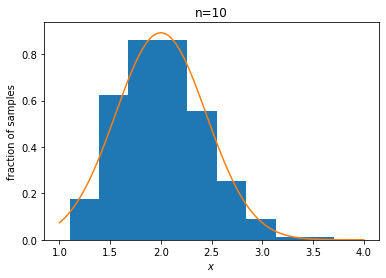

In [116]:
plt.hist(m[1], density=True, label='10') 
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title("n=10")

norm_rv = sts.norm(M, sigma/sqrt(n[1]))
x = np.linspace(1, 4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

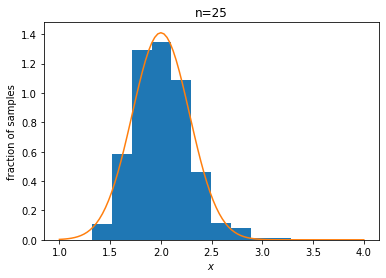

In [117]:
plt.hist(m[2], density=True, label='25') 
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title("n=25")

norm_rv = sts.norm(M, sigma/sqrt(n[2]))
x = np.linspace(1, 4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

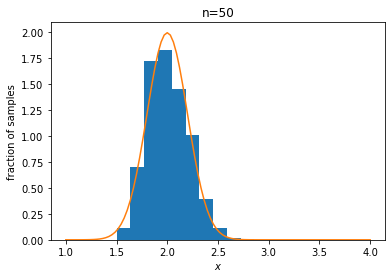

In [118]:
plt.hist(m[3], density=True, label='50') 
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title("n=50")

norm_rv = sts.norm(M, sigma/sqrt(n[3]))
x = np.linspace(1, 4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

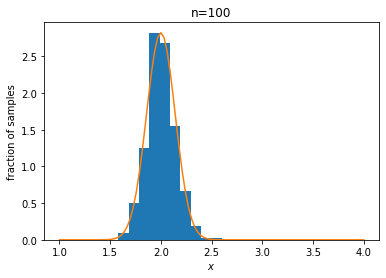

In [120]:
plt.hist(m[4], density=True, label='100') 
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title("n=100")

norm_rv = sts.norm(M, sigma/sqrt(n[4]))
x = np.linspace(1, 4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

5. Ответьте на вопросы: 
- В чем заключается разница между полученными распределениями при различных значениях n? 
- Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

1) с ростом n распределения все больше похожи на нормальное
2) с ростом n точность апроксимации увеличивается, т.к. центральная предельная теорема реализуется для больших n